In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy.stats import chi2_contingency

In [23]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [24]:
mem.loc[mem['주소지'].isna(),'주소지'] = '경기도'
mem.loc[mem['주소지'].eq('경기도') & mem['세부주소지'].isna()]

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지


> 세부 주소지는 경기도의 최빈값인 ('수원시') 처리

In [25]:
mem.loc[mem['주소지'].eq('경기도') & mem['세부주소지'].isna(), '세부주소지'] = '수원시'

> 세부주소지 결측 6개의 주소지는 세종특별자치시, 따라서 세종특별자치시 최빈값인 ('조치원읍')처리

In [26]:
mem.loc[mem['주소지'].eq('세종특별자치시') & mem['세부주소지'].isna(), '세부주소지'] = '조치원읍'

> 경기(14), 강원(1), 서울(2), 광주(3) 전부 경기도, 강원도, 서울특별시, 광주광역시로 통일

In [27]:
mem['주소지'] = mem['주소지'].replace('경기','경기도')
mem['주소지'] = mem['주소지'].replace('광주','광주광역시')
mem['주소지'] = mem['주소지'].replace('서울','서울특별시')
mem['주소지'] = mem['주소지'].replace('강원','강원도')

In [28]:
mem['주소지'].value_counts()

경기도        2299
서울특별시      1479
부산광역시      1396
경상남도       1305
경상북도        801
대구광역시       654
강원도         597
충청남도        575
충청북도        527
인천광역시       523
전라북도        488
대전광역시       488
울산광역시       419
광주광역시       392
전라남도        360
제주특별자치도     126
세종특별자치시     111
Name: 주소지, dtype: int64

In [29]:
mem['주소지'].value_counts()

경기도        2299
서울특별시      1479
부산광역시      1396
경상남도       1305
경상북도        801
대구광역시       654
강원도         597
충청남도        575
충청북도        527
인천광역시       523
전라북도        488
대전광역시       488
울산광역시       419
광주광역시       392
전라남도        360
제주특별자치도     126
세종특별자치시     111
Name: 주소지, dtype: int64

In [30]:
mem.groupby('주소지')['구독여부'].value_counts().unstack() 

구독여부,False,True
주소지,,
강원도,387,85
경기도,1507,352
경상남도,874,192
경상북도,537,112
광주광역시,264,52
대구광역시,431,94
대전광역시,338,67
부산광역시,948,177
서울특별시,997,209


In [31]:
age_subscription_counts = mem.groupby('주소지')['구독여부'].value_counts().unstack()

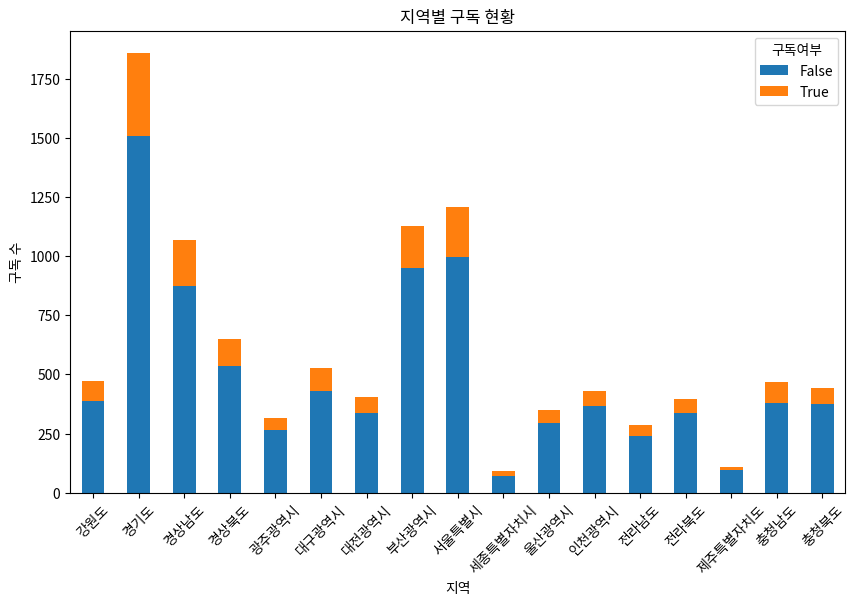

In [32]:
age_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('지역별 구독 현황')
plt.xlabel('지역')
plt.ylabel('구독 수')
plt.xticks(rotation=45)
plt.legend(title='구독여부')
plt.show()


In [33]:
# 연령대별 구독 여부 비율 계산
age_subscription_ratios = mem.groupby('주소지')['구독여부'].value_counts(normalize=True).unstack().fillna(0)
print(age_subscription_ratios)

구독여부        False     True 
주소지                        
강원도      0.819915  0.180085
경기도      0.810651  0.189349
경상남도     0.819887  0.180113
경상북도     0.827427  0.172573
광주광역시    0.835443  0.164557
대구광역시    0.820952  0.179048
대전광역시    0.834568  0.165432
부산광역시    0.842667  0.157333
서울특별시    0.826700  0.173300
세종특별자치시  0.771739  0.228261
울산광역시    0.837143  0.162857
인천광역시    0.857809  0.142191
전라남도     0.841549  0.158451
전라북도     0.848485  0.151515
제주특별자치도  0.872727  0.127273
충청남도     0.815846  0.184154
충청북도     0.844244  0.155756


In [34]:
# 교차 테이블 생성
cross_table = pd.crosstab(mem['주소지'], mem['구독여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

# 결과 출력
print("카이제곱 값:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도:", expected)
print("결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 지역별 구독여부는 동일하다.")

카이제곱 값: 16.094613957022613
p-value: 0.4463771456246305
자유도: 16
예상 빈도: [[ 390.83303904   81.16696096]
 [1539.31910928  319.68089072]
 [ 882.68648224  183.31351776]
 [ 537.39542868  111.60457132]
 [ 261.65940749   54.34059251]
 [ 434.71895232   90.28104768]
 [ 335.35462036   69.64537964]
 [ 931.54061212  193.45938788]
 [ 998.6115362   207.3884638 ]
 [  76.17932117   15.82067883]
 [ 289.81263488   60.18736512]
 [ 355.22748676   73.77251324]
 [ 235.16225231   48.83774769]
 [ 327.90229547   68.09770453]
 [  91.08397096   18.91602904]
 [ 386.69285854   80.30714146]
 [ 366.81999215   76.18000785]]
결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 지역별 구독여부는 동일하다.
